In [1]:
!pip install mrmr-selection

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 1.4 MB/s eta 0:00:00


In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from mrmr import mrmr_classif
from sklearn.feature_selection import mutual_info_classif, chi2, RFE
from sklearn.linear_model import LassoCV
import numpy as np
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [3]:
directory = '/content/drive/MyDrive/Colab Notebooks/Project/'
# file_path = directory + 'clean_data_mice_knn.xlsx'
file_path = directory + 'normalized_data.xlsx'

imputed_df = pd.read_excel(file_path)
imputed_df

,Status,Race,lysoPC a C16:0,lysoPC a C16:1,lysoPC a C17:0,lysoPC a C18:0,lysoPC a C18:1,lysoPC a C18:2,lysoPC a C20:3,lysoPC a C20:4,...,Lys,Met,Orn,Phe,Pro,Ser,Thr,Trp,Tyr,Val
0,1,1,0.135959,0.131794,0.026262,0.127203,0.275701,0.272440,0.083199,0.429530,...,0.646751,0.326418,0.339759,0.398522,0.403831,0.472296,0.595070,0.457642,0.355143,0.332584
1,1,0,0.147308,0.216408,0.016882,0.082599,0.099688,0.087231,0.173946,0.375323,...,0.348024,0.237898,0.296386,0.385753,0.366693,0.201055,0.313380,0.499563,0.446135,0.420225
2,0,0,0.457054,0.598087,0.075925,0.296256,1.000000,1.000000,0.237554,0.468250,...,0.688778,0.691563,0.672289,0.697581,0.759578,0.931398,1.000000,0.546725,0.726111,0.438202
3,0,0,0.022252,0.095006,0.015037,0.024229,0.009346,0.007585,0.038250,0.076923,...,0.520672,0.304288,0.325301,0.375000,0.585614,0.472296,0.556338,0.616594,0.421789,0.638202
4,0,0,0.015576,0.087648,0.000000,0.019824,0.034268,0.000000,0.065389,0.129066,...,0.000000,0.062241,0.006747,0.016129,0.126271,0.000000,0.005282,0.032314,0.024954,0.017978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0,1,0.368046,0.199853,0.049479,0.341410,0.389408,0.357775,0.146807,0.395973,...,0.245797,0.193638,0.205301,0.210349,0.263096,0.298153,0.190141,0.322271,0.191114,0.238202
90,0,1,0.568313,0.366320,0.051939,0.400881,0.523364,0.417193,0.178187,0.442437,...,0.659246,0.558783,0.696386,0.811828,0.876857,0.498681,0.517606,0.737991,0.659160,0.871910
91,0,1,0.425901,0.242159,0.045481,0.427313,0.582555,0.604298,0.262997,0.664430,...,0.484325,0.284924,0.416867,0.536290,0.517201,0.280211,0.345070,0.558079,0.264760,0.541573
92,0,1,0.350245,0.175940,0.041483,0.317181,0.274143,0.337547,0.148503,0.437274,...,0.457065,0.360996,0.455422,0.335349,0.869038,0.641161,0.669014,0.432314,0.446135,0.487640


# Filter rows where Status is "Prostate cancer" (1)

In [4]:
df_race = imputed_df[imputed_df['Status'] == 1]
df_race.info()
df_race.head()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 0 to 83
Columns: 187 entries, Status to Val
dtypes: float64(185), int64(2)
memory usage: 64.6 KB


,Status,Race,lysoPC a C16:0,lysoPC a C16:1,lysoPC a C17:0,lysoPC a C18:0,lysoPC a C18:1,lysoPC a C18:2,lysoPC a C20:3,lysoPC a C20:4,...,Lys,Met,Orn,Phe,Pro,Ser,Thr,Trp,Tyr,Val
0,1,1,0.135959,0.131794,0.026262,0.127203,0.275701,0.272440,0.083199,0.429530,...,0.646751,0.326418,0.339759,0.398522,0.403831,0.472296,0.595070,0.457642,0.355143,0.332584
1,1,0,0.147308,0.216408,0.016882,0.082599,0.099688,0.087231,0.173946,0.375323,...,0.348024,0.237898,0.296386,0.385753,0.366693,0.201055,0.313380,0.499563,0.446135,0.420225
5,1,1,0.283489,0.195254,0.050401,0.204846,0.398754,0.362832,0.198541,0.375323,...,0.543389,0.611342,0.412048,0.596774,0.632525,0.672823,0.609155,0.593013,0.939136,0.683146
13,1,0,0.483756,1.000000,0.797042,0.843612,0.155763,0.085967,0.064541,0.106866,...,0.552476,0.423237,0.518072,0.637097,0.689210,0.482850,0.359155,0.571179,0.586123,0.442697
14,1,0,0.354695,0.476685,0.055937,0.201542,0.454829,0.227560,0.351200,0.571502,...,0.681963,0.396957,0.556627,0.569892,0.521110,0.540897,0.313380,0.336245,0.482654,0.656180


In [5]:
df_race['Race'].value_counts()

,count
Race,
1,22
0,22


In [6]:
X = df_race.drop(columns=['Race', 'Status'])
y = df_race['Race']

# feature selection

##Mututal Inbformation/information gain

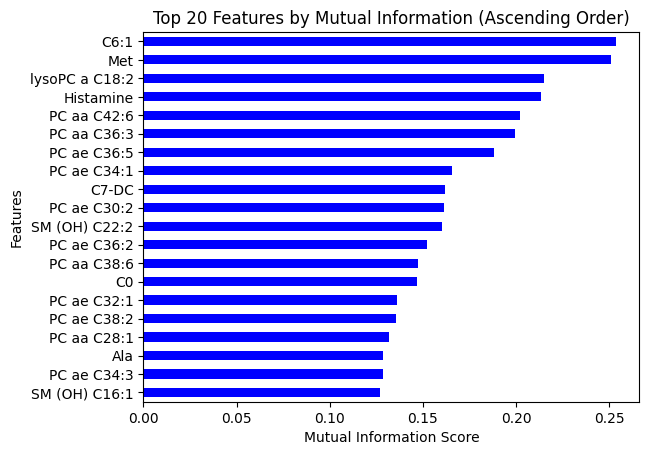

Accuracy using Mutual Information selected features: 0.8889
C6:1              0.253539
Met               0.251080
lysoPC a C18:2    0.215207
Histamine         0.213668
PC aa C42:6       0.201925
PC aa C36:3       0.199309
PC ae C36:5       0.188262
PC ae C34:1       0.165831
C7-DC             0.161926
PC ae C30:2       0.161404
SM (OH) C22:2     0.160462
PC ae C36:2       0.152077
PC aa C38:6       0.147496
C0                0.147019
PC ae C32:1       0.136007
PC ae C38:2       0.135493
PC aa C28:1       0.131738
Ala               0.128585
PC ae C34:3       0.128467
SM (OH) C16:1     0.126782
dtype: float64


In [7]:
# Compute mutual information
mi = mutual_info_classif(X, y, random_state=42)


# Create a Series of the results and select top 20 features
mi_df = pd.Series(mi, index=X.columns).nlargest(20)

# Plot the top 20 features with the highest mutual information
mi_df.sort_values(ascending=True).plot(kind='barh', color='blue')
plt.title('Top 20 Features by Mutual Information (Ascending Order)')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.show()

# Select the top 20 features
top_20_features_mi = mi_df.index

X_train, X_test, y_train, y_test = train_test_split(X[top_20_features_mi], y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test data and calculate accuracy using the selected features
y_pred_mi = rf.predict(X_test)
accuracy_mi = accuracy_score(y_test, y_pred_mi)

print(f'Accuracy using Mutual Information selected features: {accuracy_mi:.4f}')
print(mi_df)

##Chi Sqaure test

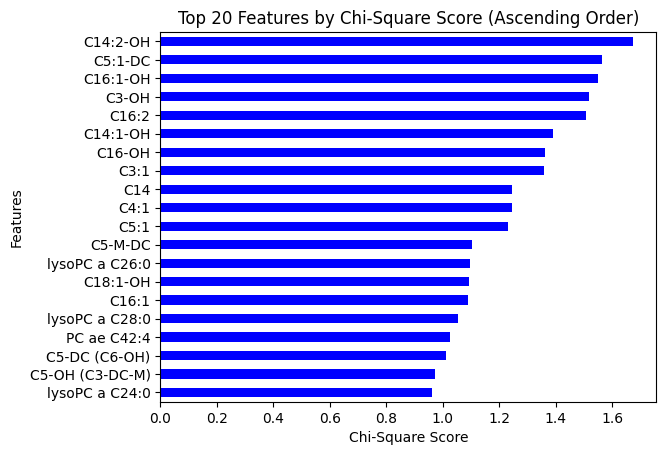

Accuracy using Chi-Square selected features: 0.5556
C14:2-OH           1.671937
C5:1-DC            1.564668
C16:1-OH           1.548732
C3-OH              1.516452
C16:2              1.508014
C14:1-OH           1.390162
C16-OH             1.361510
C3:1               1.358703
C14                1.245216
C4:1               1.243472
C5:1               1.232133
C5-M-DC            1.104845
lysoPC a C26:0     1.094950
C18:1-OH           1.091371
C16:1              1.088418
lysoPC a C28:0     1.055228
PC ae C42:4        1.024429
C5-DC (C6-OH)      1.009991
C5-OH (C3-DC-M)    0.974005
lysoPC a C24:0     0.961451
dtype: float64


In [8]:
# # Scale the features to non-negative values
# X_scaled = MinMaxScaler().fit_transform(X)

# # Compute chi-square statistics
# chi_scores, p_values = chi2(X_scaled, y)

chi_scores, p_values = chi2(X, y)

# Create a Series of the chi-square scores and select the top 20 features
chi2_df = pd.Series(chi_scores, index=X.columns).nlargest(20)

# Plot the top 20 features based on chi-square scores
chi2_df.sort_values(ascending=True).plot(kind='barh', color='blue')
plt.title('Top 20 Features by Chi-Square Score (Ascending Order)')
plt.xlabel('Chi-Square Score')
plt.ylabel('Features')
plt.show()

# Select the top 20 features
top_20_features_chi2 = chi2_df.index

X_train, X_test, y_train, y_test = train_test_split(X[top_20_features_chi2], y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test data and calculate accuracy using the selected features
y_pred_chi2 = rf.predict(X_test)
accuracy_chi2 = accuracy_score(y_test, y_pred_chi2)

print(f'Accuracy using Chi-Square selected features: {accuracy_chi2:.4f}')
print(chi2_df)

##Pearson Correlation Coefficient

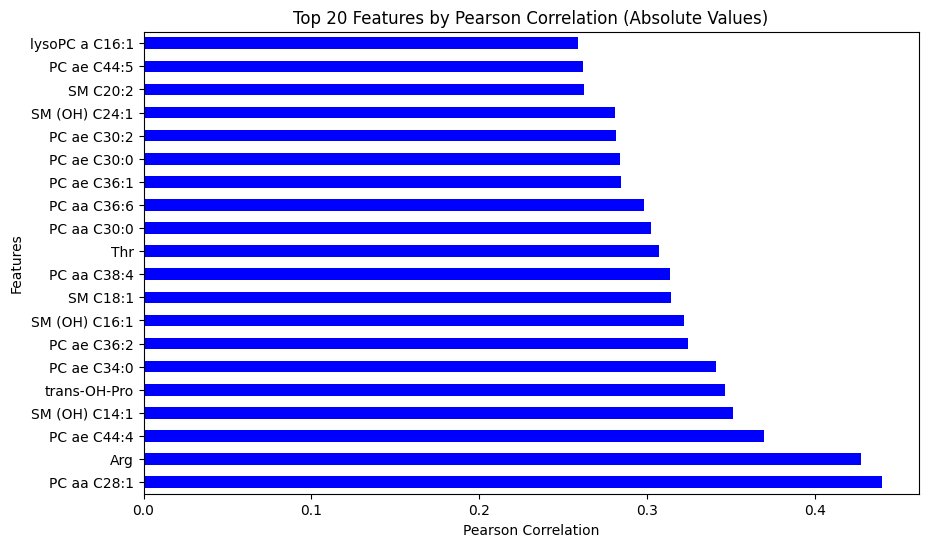

Accuracy using top 20 Pearson correlated features: 0.8889
PC aa C28:1       0.439875
Arg               0.427813
PC ae C44:4       0.369606
SM (OH) C14:1     0.351551
trans-OH-Pro      0.346476
PC ae C34:0       0.341091
PC ae C36:2       0.324196
SM (OH) C16:1     0.322045
SM C18:1          0.314074
PC aa C38:4       0.313873
Thr               0.307417
PC aa C30:0       0.302277
PC aa C36:6       0.298430
PC ae C36:1       0.284416
PC ae C30:0       0.283961
PC ae C30:2       0.281701
SM (OH) C24:1     0.280986
SM C20:2          0.262559
PC ae C44:5       0.261898
lysoPC a C16:1    0.259098
Name: Race, dtype: float64


In [9]:
# Calculate Pearson correlation with respect to the target variable (Race)
pearson_corr = df_race.corr()['Race'].drop('Race')

# Sort by absolute correlation and get the top 20 features
top_20_pearson = pearson_corr.abs().nlargest(20)

# Plotting the top 20 features based on Pearson correlation in blue color
plt.figure(figsize=(10, 6))
top_20_pearson.plot(kind='barh', color='blue')
plt.title('Top 20 Features by Pearson Correlation (Absolute Values)')
plt.xlabel('Pearson Correlation')
plt.ylabel('Features')
plt.show()

# Selecting the top 20 features for model training
top_20_features_pearson = top_20_pearson.index

X_train, X_test, y_train, y_test = train_test_split(X[top_20_features_pearson], y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test data and calculate accuracy using the selected features
y_pred_prsn = rf.predict(X_test)
accuracy_prsn = accuracy_score(y_test, y_pred_prsn)
print(f'Accuracy using top 20 Pearson correlated features: {accuracy_prsn:.4f}')
print(top_20_pearson)

##Spearman Correlation Coefficient

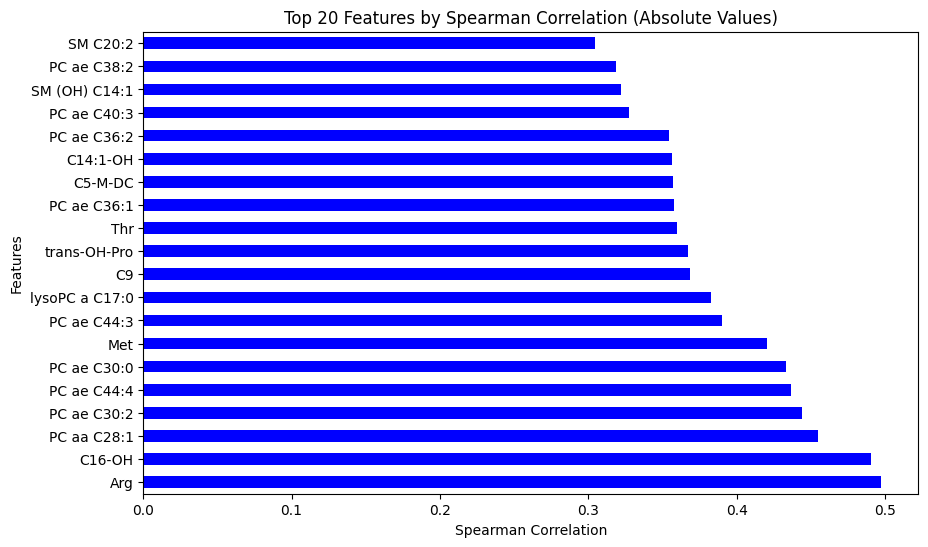

Accuracy using top 20 Spearman correlated features: 0.7778
Arg               0.497591
C16-OH            0.490600
PC aa C28:1       0.454666
PC ae C30:2       0.443941
PC ae C44:4       0.436750
PC ae C30:0       0.433155
Met               0.420641
PC ae C44:3       0.390349
lysoPC a C17:0    0.383065
C9                0.368901
trans-OH-Pro      0.366929
Thr               0.359833
PC ae C36:1       0.357979
C5-M-DC           0.357173
C14:1-OH          0.356680
PC ae C36:2       0.354462
PC ae C40:3       0.327574
SM (OH) C14:1     0.322181
PC ae C38:2       0.318613
SM C20:2          0.304304
Name: Race, dtype: float64


In [10]:
# Calculate Spearman correlation with respect to the target variable (Race)
spearman_corr = df_race.corr(method='spearman')['Race'].drop('Race')

# Sort by absolute correlation and get the top 20
top_20_spearman = spearman_corr.abs().nlargest(20)

# Plotting the top 20 features based on Spearman correlation
plt.figure(figsize=(10, 6))
top_20_spearman.plot(kind='barh', color='blue')
plt.title('Top 20 Features by Spearman Correlation (Absolute Values)')
plt.xlabel('Spearman Correlation')
plt.ylabel('Features')
plt.show()

# Selecting the top 20 features for model training
top_20_features = top_20_spearman.index

X_train, X_test, y_train, y_test = train_test_split(X[top_20_features], y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test data and calculate accuracy using the selected features
y_pred_sprmn = rf.predict(X_test)
accuracy_sprmn = accuracy_score(y_test, y_pred_sprmn)

print(f'Accuracy using top 20 Spearman correlated features: {accuracy_sprmn:.4f}')
print(top_20_spearman)


##Mean Absolute Difference (MAD)

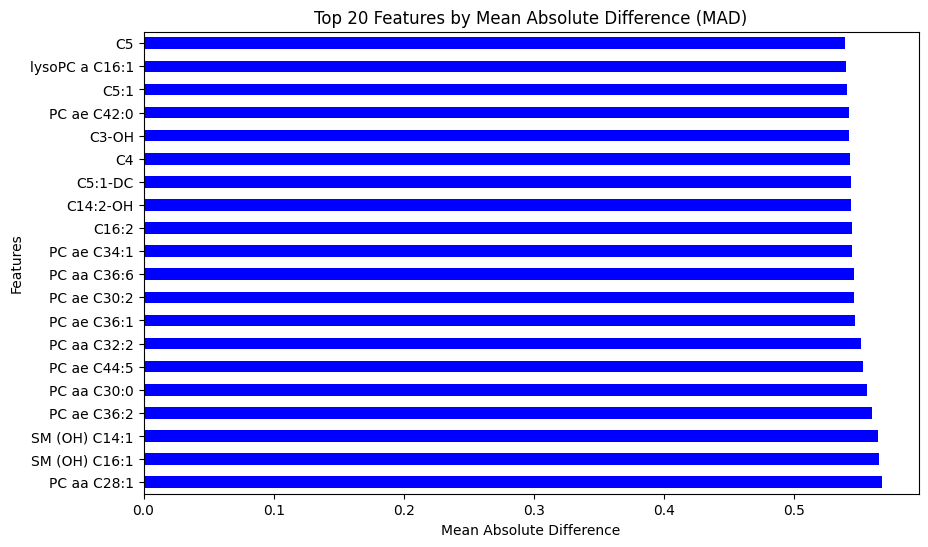

Accuracy using top 20 MAD features: 0.7778
PC aa C28:1       0.567316
SM (OH) C16:1     0.565004
SM (OH) C14:1     0.564205
PC ae C36:2       0.560064
PC aa C30:0       0.556356
PC ae C44:5       0.553310
PC aa C32:2       0.551258
PC ae C36:1       0.547008
PC ae C30:2       0.546194
PC aa C36:6       0.545770
PC ae C34:1       0.544745
C16:2             0.544354
C14:2-OH          0.543733
C5:1-DC           0.543526
C4                0.542786
C3-OH             0.542484
PC ae C42:0       0.542130
C5:1              0.540449
lysoPC a C16:1    0.539903
C5                0.539276
dtype: float64


In [11]:
# Calculate Mean Absolute Difference (MAD) for each feature with respect to the target variable
mad_values = X.apply(lambda x: (x - y).abs().mean())

# Select top 20 features in descending order
top_20_mad = mad_values.nlargest(20)

# Plotting the top 20 features based on MAD in blue color
plt.figure(figsize=(10, 6))
top_20_mad.plot(kind='barh', color='blue')
plt.title('Top 20 Features by Mean Absolute Difference (MAD)')
plt.xlabel('Mean Absolute Difference')
plt.ylabel('Features')
plt.show()

# Selecting the top 20 features for model training
top_features = top_20_mad.index

X_train, X_test, y_train, y_test = train_test_split(X[top_features], y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test data and calculate accuracy using the selected features
y_pred_mad = rf.predict(X_test)
accuracy_mad = accuracy_score(y_test, y_pred_mad)
print(f'Accuracy using top 20 MAD features: {accuracy_mad:.4f}')
print(top_20_mad)

##Recursive Feature Elimination (RFE)

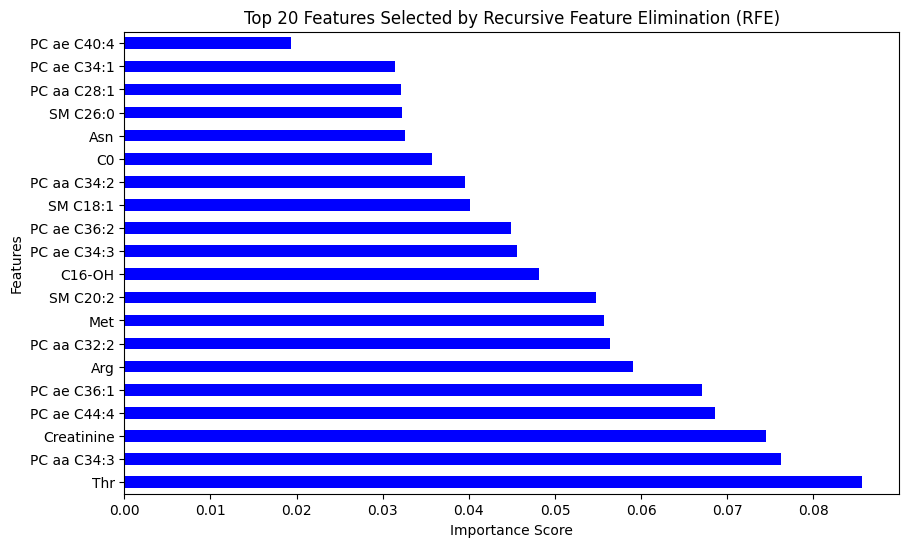

Accuracy using Recursive Feature Elimination top 20 features: 0.6667
Thr            0.085690
PC aa C34:3    0.076290
Creatinine     0.074533
PC ae C44:4    0.068547
PC ae C36:1    0.067031
Arg            0.059064
PC aa C32:2    0.056382
Met            0.055710
SM C20:2       0.054795
C16-OH         0.048097
PC ae C34:3    0.045643
PC ae C36:2    0.044933
SM C18:1       0.040120
PC aa C34:2    0.039600
C0             0.035736
Asn            0.032636
SM C26:0       0.032218
PC aa C28:1    0.032160
PC ae C34:1    0.031487
PC ae C40:4    0.019329
dtype: float64


In [12]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Recursive Feature Elimination object
rfe = RFE(estimator=rf, n_features_to_select=20)

# Fit the RFE object to the data
rfe.fit(X_train, y_train)

# Get the selected features
top_20_features_rfe = X_train.columns[rfe.support_]

rf.fit(X_train[top_20_features_rfe], y_train)

# Create a series of feature importances
feature_importances_rfe = pd.Series(rf.feature_importances_, index=top_20_features_rfe)

# Sort features by importance score in descending order
sorted_feature_importances_rfe = feature_importances_rfe.sort_values(ascending=False)

# Plotting the top 20 features based on their importances in blue color
plt.figure(figsize=(10, 6))
sorted_feature_importances_rfe.plot(kind='barh', color='blue')
plt.title('Top 20 Features Selected by Recursive Feature Elimination (RFE)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Predict on the test data and calculate accuracy using the selected features
y_pred_rfe = rf.predict(X_test[top_20_features_rfe])
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

print(f'Accuracy using Recursive Feature Elimination top 20 features: {accuracy_rfe:.4f}')
print(sorted_feature_importances_rfe)

##Random Forest Importance

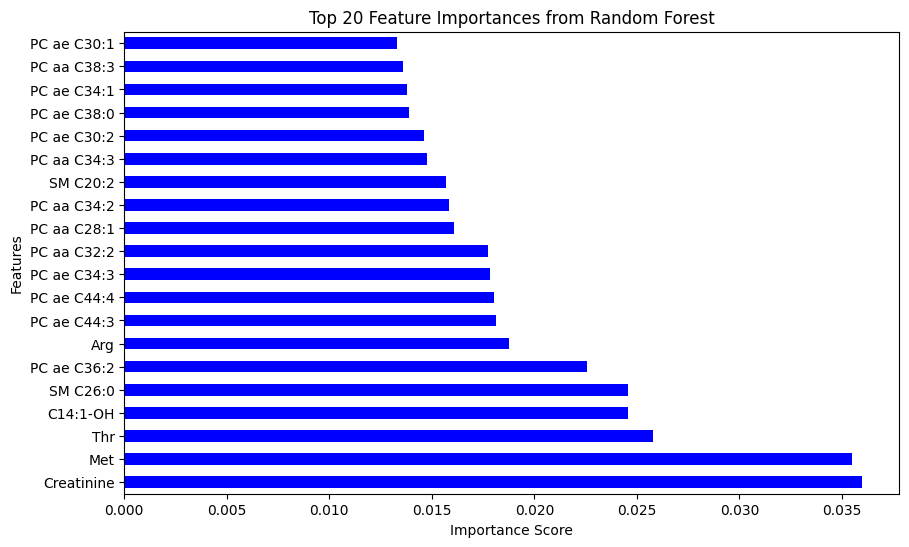

Accuracy using Random Forest Importance top 20 features: 0.7778
Creatinine     0.036000
Met            0.035502
Thr            0.025810
C14:1-OH       0.024591
SM C26:0       0.024555
PC ae C36:2    0.022579
Arg            0.018742
PC ae C44:3    0.018151
PC ae C44:4    0.018029
PC ae C34:3    0.017844
PC aa C32:2    0.017724
PC aa C28:1    0.016060
PC aa C34:2    0.015853
SM C20:2       0.015706
PC aa C34:3    0.014744
PC ae C30:2    0.014632
PC ae C38:0    0.013900
PC ae C34:1    0.013794
PC aa C38:3    0.013575
PC ae C30:1    0.013289
dtype: float64


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.Series(importances, index=X.columns)

# Select the top 20 features
top_20_features_rffi = feature_importances.nlargest(20)
top_20_features_names = top_20_features_rffi.index

# Plotting the top 20 feature importances
plt.figure(figsize=(10, 6))
top_20_features_rffi.plot(kind='barh', color='blue')
plt.title('Top 20 Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
# plt.axvline(0, color='grey', linestyle='--')  # Optional: add a vertical line at x=0
plt.show()

# Predict on the test data and calculate accuracy using the selected features
# Select the top 20 features (by column names)
top_20_feature_names = top_20_features_rffi.index

rf.fit(X_train[top_20_feature_names], y_train)

# Predict on the test data and calculate accuracy using the selected features
y_pred_rffi = rf.predict(X_test[top_20_feature_names])
accuracy_rffi = accuracy_score(y_test, y_pred_rffi)

print(f'Accuracy using Random Forest Importance top 20 features: {accuracy_rffi:.4f}')
print(top_20_features_rffi)

##mRMR

100%|██████████| 20/20 [00:01<00:00, 15.98it/s]


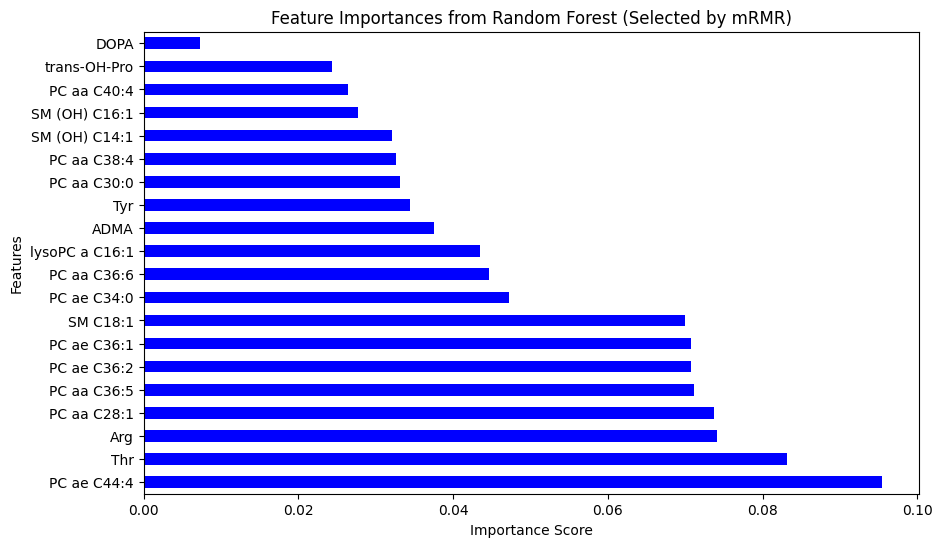

Accuracy using Random Forest with mRMR selected features: 0.8889
Top 20 Features Selected by mRMR with Importances:
PC ae C44:4       0.095387
Thr               0.083121
Arg               0.074101
PC aa C28:1       0.073719
PC aa C36:5       0.071164
PC ae C36:2       0.070706
PC ae C36:1       0.070703
SM C18:1          0.070003
PC ae C34:0       0.047248
PC aa C36:6       0.044688
lysoPC a C16:1    0.043533
ADMA              0.037483
Tyr               0.034427
PC aa C30:0       0.033148
PC aa C38:4       0.032587
SM (OH) C14:1     0.032135
SM (OH) C16:1     0.027774
PC aa C40:4       0.026442
trans-OH-Pro      0.024330
DOPA              0.007302
dtype: float64


In [14]:
# Using mRMR to select the top 20 features
top_features = mrmr_classif(X=X, y=y, K=20)

X_train, X_test, y_train, y_test = train_test_split(X[top_features], y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances specifically for the mRMR selected features
importances = rf.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.Series(importances, index=top_features)

# Sort by importance score
sorted_importances = feature_importances.sort_values(ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='barh', color='blue')
plt.title('Feature Importances from Random Forest (Selected by mRMR)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Predict on the test data and calculate accuracy using the selected features
y_pred_mrmr = rf.predict(X_test)
accuracy_mrmr = accuracy_score(y_test, y_pred_mrmr)

print(f'Accuracy using Random Forest with mRMR selected features: {accuracy_mrmr:.4f}')
print("Top 20 Features Selected by mRMR with Importances:")
print(sorted_importances)


<Figure size 1000x600 with 0 Axes>

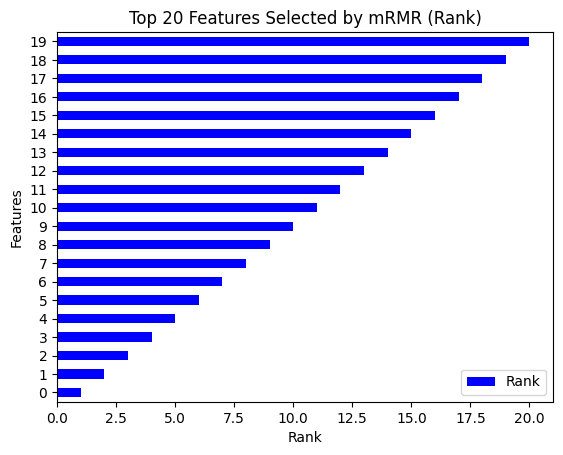

Top 20 Features Selected by mRMR (rank):
           Feature  Rank
0      PC aa C28:1     1
1             DOPA     2
2              Thr     3
3         SM C18:1     4
4              Arg     5
5      PC ae C34:0     6
6     trans-OH-Pro     7
7      PC aa C36:5     8
8      PC ae C44:4     9
9    SM (OH) C14:1    10
10     PC ae C36:2    11
11     PC aa C40:4    12
12     PC aa C36:6    13
13            ADMA    14
14   SM (OH) C16:1    15
15     PC aa C38:4    16
16     PC aa C30:0    17
17  lysoPC a C16:1    18
18     PC ae C36:1    19
19             Tyr    20


In [15]:
# Create a DataFrame for the selected features (with rank)
importance_df = pd.DataFrame({'Feature': top_features, 'Rank': range(1, len(top_features) + 1)})

# Plotting the selected features based on their rank
plt.figure(figsize=(10, 6))
# plt.barh(importance_df['Feature'], importance_df['Rank'], color='steelblue')
importance_df.plot(kind='barh', color='blue')
plt.title('Top 20 Features Selected by mRMR (Rank)')
plt.xlabel('Rank')
plt.ylabel('Features')
plt.show()

# Print sorted selected features
print("Top 20 Features Selected by mRMR (rank):")
print(importance_df)

##Lasso Regression

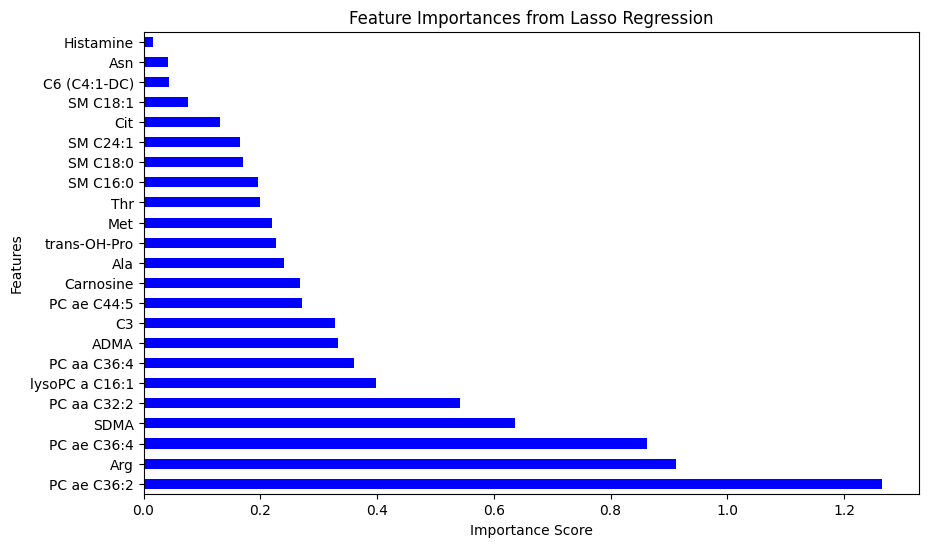

Accuracy using Random Forest with Lasso selected features: 0.5556
Top Features Selected by Lasso with Importances:
PC ae C36:2       1.264209
Arg               0.911702
PC ae C36:4       0.861810
SDMA              0.636290
PC aa C32:2       0.542873
lysoPC a C16:1    0.398822
PC aa C36:4       0.361207
ADMA              0.333385
C3                0.328296
PC ae C44:5       0.270586
Carnosine         0.267978
Ala               0.239912
trans-OH-Pro      0.227269
Met               0.220804
Thr               0.199991
SM C16:0          0.196913
SM C18:0          0.169567
SM C24:1          0.164487
Cit               0.130955
SM C18:1          0.076143
C6 (C4:1-DC)      0.043626
Asn               0.041443
Histamine         0.015879
dtype: float64


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Lasso model with cross-validation to select features
lasso = LassoCV(alphas=np.logspace(-4, 0, 50), cv=5, random_state=42)
lasso.fit(X_train, y_train)

# Get the coefficients and select features with non-zero coefficients
coef = lasso.coef_
selected_features = np.where(coef != 0)[0]

# Create a DataFrame for feature importances
feature_importances = pd.Series(np.abs(coef[selected_features]), index=X.columns[selected_features])

# Sort by importance score
sorted_importances = feature_importances.sort_values(ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='barh', color='blue')
plt.title('Feature Importances from Lasso Regression')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train.iloc[:, selected_features], y_train)

# Predict on the test data and calculate accuracy using the selected features
y_pred_lasso = rf.predict(X_test.iloc[:, selected_features])
accuracy_lasso = accuracy_score(y_test, y_pred_lasso)

print(f'Accuracy using Random Forest with Lasso selected features: {accuracy_lasso:.4f}')
print("Top Features Selected by Lasso with Importances:")
print(sorted_importances)


#mRMR

In [17]:
results = []

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop over K values from 10 to 100
for K in range(10, 101):
    # Use mRMR to select top K features
    top_features = mrmr_classif(X=X, y=y, K=K)


    # Select only the top K features from the consistent train/test sets
    X_train_top = X_train[top_features]
    X_test_top = X_test[top_features]

    # Random Forest classifier
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_top, y_train)

    # Predict on the test data and calculate accuracy
    y_pred_mrmr = rf.predict(X_test_top)
    accuracy_mrmr = accuracy_score(y_test, y_pred_mrmr)

    # Format the accuracy to 5 decimal places
    accuracy_mrmr = round(accuracy_mrmr, 5)

    # Get feature importances specifically for the mRMR selected features
    importances = rf.feature_importances_

    # Create a DataFrame for feature importances
    feature_importances = pd.Series(importances, index=top_features)

    # Sort by importance score
    sorted_importances = feature_importances.sort_values(ascending=False)

    # Create dictionaries for feature rank and importance
    feature_rank = {feature: rank + 1 for rank, feature in enumerate(sorted_importances.index)}
    feature_importance = {feature: importance for feature, importance in zip(sorted_importances.index, sorted_importances.values)}

    # Store results for this K
    results.append({
        'K': K,
        'Accuracy': accuracy_mrmr,
        'Feature_Rank': feature_rank,
        'Feature_Importance': feature_importance,
        'Selected_Features': top_features
    })

# Convert results to DataFrame for saving to Excel
final_results = pd.DataFrame(results)

file_path = directory + 'mrmr_race_results.xlsx'
final_results.to_excel(file_path, index=False)

print(f"Results saved to {file_path}")

100%|██████████| 100/100 [00:06<00:00, 14.59it/s]


Results saved to /content/drive/MyDrive/Colab Notebooks/Project/mrmr_race_results.xlsx
